# CS310 Natural Language Processing
# Lab 3: Word Vectors

Install `scikit-learn`, `matplotlib`, and `gensim` first

```bash
pip install -U scikit-learn matplotlib gensim
```

In [5]:
import itertools
from typing import List

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD

## T1. Latent Semantic Analysis (LSA) - A word-document-based approach

We are working on the first ten chapters of 《论语》 (The Analects of Confucius) in this lab. The text is in Chinese (with punctuations).

First, load the corpus data from the folder `lunyu` into a list of documents. We read all lines from the ten TXT files and combine them into a list of strings, `documents`. Each line of text is considered as a *document*.

The file names are in the format of `text_ch1.txt`, `text_ch2.txt`, ..., `text_ch10.txt`.

In [6]:
documents = []
for i in range(1, 11):
    with open(f"lunyu/text_ch{i}.txt", "r",encoding='UTF-8') as f:
        for line in f:
            documents.append(line.strip())

# Test result
print(len(documents))
print(documents[:3])

267
['子曰： 学而时习之，不亦说乎？有朋自远方来，不亦乐乎？人不知而不愠，不亦君子乎？', '有子曰： 其为人也孝弟，而好犯上者，鲜矣；不好犯上而好作乱者，未之有也。君子务本，本立而道生。孝弟也者，其为仁之本与！', '子曰： 巧言令色，鲜矣仁！']


### Clean the data

Replace spaces `' '` with empty string `''`

In [7]:
documents

['子曰： 学而时习之，不亦说乎？有朋自远方来，不亦乐乎？人不知而不愠，不亦君子乎？',
 '有子曰： 其为人也孝弟，而好犯上者，鲜矣；不好犯上而好作乱者，未之有也。君子务本，本立而道生。孝弟也者，其为仁之本与！',
 '子曰： 巧言令色，鲜矣仁！',
 '曾子曰： 吾日三省吾身：为人谋而不忠乎？与朋友交而不信乎？传不习乎？',
 '子曰： 道千乘之国，敬事而信，节用而爱人，使民以时。',
 '子曰： 弟子入则孝，出则弟，谨而信，泛爱众，而亲仁，行有余力，则以学文。',
 '子夏曰： 贤贤易色；事父母，能竭其力；事君，能致其身；与朋友交，言而有信。虽曰未学，吾必谓之学矣。',
 '子曰： 君子不重则不威，学则不固。主忠信，无友不如己者，过，则勿惮改。',
 '曾子曰： 慎终追远，民德归厚矣。',
 '子禽问于子贡曰： 夫子至于是邦也，必闻其政，求之与，抑与之与？ 子贡曰： 夫子温、良、恭、俭、让以得之。夫子之求之也，其诸异乎人之求之与？',
 '子曰： 父在，观其志；父没，观其行；三年无改于父之道，可谓孝矣。',
 '有子曰： 礼之用，和为贵。先王之道，斯为美。小大由之，有所不行。知和而和，不以礼节之，亦不可行也。',
 '有子曰： 信近于义，言可复也。恭近于礼，远耻辱也。因不失其亲，亦可宗也。',
 '子曰： 君子食无求饱，居无求安，敏于事而慎于言，就有道而正焉，可谓好学也已。',
 '子贡曰： 贫而无谄，富而无骄，何如？ 子曰： 可也。未若贫而乐，富而好礼者也。 子贡曰： 《诗》云： 如切如磋，如琢如磨 ，其斯之谓与？ 子曰： 赐也，始可与言《诗》已矣，告诸往而知来者。',
 '子曰： 不患人之不己知，患不知人也。',
 '子曰： 为政以德，譬如北辰，居其所而众星共之。',
 '子曰： 《诗》三百，一言以蔽之，曰： 思无邪 。',
 '子曰： 道之以政，齐之以刑，民免而无耻。道之以德，齐之以礼，有耻且格。',
 '子曰： 吾十有五而志于学，三十而立，四十而不惑，五十而知天命，六十而耳顺，七十而从心所欲，不逾矩。',
 '孟懿子问孝，子曰： 无违。 樊迟御，子告之曰： 孟孙问孝于我，我对曰 无违 。 樊迟曰： 何谓也？ 子曰： 生，事之以礼；死，葬之以礼，祭之以礼。',
 '孟武伯问孝。子曰： 父母唯其疾之忧。',
 '子游问孝。子曰： 今之孝者，是谓能养。至于犬

In [8]:
### START TODO ###
    # documents: List[str] = None

documents = [s.replace(" ", "") for s in documents]

documents
### END TODO ###

['子曰：学而时习之，不亦说乎？有朋自远方来，不亦乐乎？人不知而不愠，不亦君子乎？',
 '有子曰：其为人也孝弟，而好犯上者，鲜矣；不好犯上而好作乱者，未之有也。君子务本，本立而道生。孝弟也者，其为仁之本与！',
 '子曰：巧言令色，鲜矣仁！',
 '曾子曰：吾日三省吾身：为人谋而不忠乎？与朋友交而不信乎？传不习乎？',
 '子曰：道千乘之国，敬事而信，节用而爱人，使民以时。',
 '子曰：弟子入则孝，出则弟，谨而信，泛爱众，而亲仁，行有余力，则以学文。',
 '子夏曰：贤贤易色；事父母，能竭其力；事君，能致其身；与朋友交，言而有信。虽曰未学，吾必谓之学矣。',
 '子曰：君子不重则不威，学则不固。主忠信，无友不如己者，过，则勿惮改。',
 '曾子曰：慎终追远，民德归厚矣。',
 '子禽问于子贡曰：夫子至于是邦也，必闻其政，求之与，抑与之与？子贡曰：夫子温、良、恭、俭、让以得之。夫子之求之也，其诸异乎人之求之与？',
 '子曰：父在，观其志；父没，观其行；三年无改于父之道，可谓孝矣。',
 '有子曰：礼之用，和为贵。先王之道，斯为美。小大由之，有所不行。知和而和，不以礼节之，亦不可行也。',
 '有子曰：信近于义，言可复也。恭近于礼，远耻辱也。因不失其亲，亦可宗也。',
 '子曰：君子食无求饱，居无求安，敏于事而慎于言，就有道而正焉，可谓好学也已。',
 '子贡曰：贫而无谄，富而无骄，何如？子曰：可也。未若贫而乐，富而好礼者也。子贡曰：《诗》云：如切如磋，如琢如磨，其斯之谓与？子曰：赐也，始可与言《诗》已矣，告诸往而知来者。',
 '子曰：不患人之不己知，患不知人也。',
 '子曰：为政以德，譬如北辰，居其所而众星共之。',
 '子曰：《诗》三百，一言以蔽之，曰：思无邪。',
 '子曰：道之以政，齐之以刑，民免而无耻。道之以德，齐之以礼，有耻且格。',
 '子曰：吾十有五而志于学，三十而立，四十而不惑，五十而知天命，六十而耳顺，七十而从心所欲，不逾矩。',
 '孟懿子问孝，子曰：无违。樊迟御，子告之曰：孟孙问孝于我，我对曰无违。樊迟曰：何谓也？子曰：生，事之以礼；死，葬之以礼，祭之以礼。',
 '孟武伯问孝。子曰：父母唯其疾之忧。',
 '子游问孝。子曰：今之孝者，是谓能养。至于犬马，皆能有养；不敬，何以别乎？',
 '子夏问孝。子曰：色难。有事，弟子服其劳；有酒食

Concatenate all documents into a single string `words`, whose length is the number of tokens in the corpus.

In [9]:
### START TODO ###
words: str = "".join(documents)
### END TODO ###

In [10]:
# Test result
print(len(words))

# You are expected to see the following output:
# 8664

8664


### Build vocabulary

Use `collections.Counter` to build a vocabulary of characters (字) from the cleaned data. Yes, we do not use word segmentation here. 

In [11]:
import collections
import re
### START TODO ###
words_str = " ".join(documents)
chinese_characters = re.findall(r'[\u4e00-\u9fa5\u3000-\u303F\uff00-\uffef]', words_str)
vocab = collections.Counter(chinese_characters)
### END TODO ###

In [12]:
# Test result
print(vocab.most_common(10))

# You are expected to see the following output:
# [('，', 738), ('。', 405), ('子', 402), ('：', 339), ('曰', 318), ...

[('，', 738), ('。', 405), ('子', 402), ('：', 339), ('曰', 318), ('不', 272), ('也', 254), ('之', 251), ('而', 155), ('？', 126)]


**Construct `word2index`**

Use the vocabulary to build a `word2index` dictionary, which maps each character to an integer index.

The order of indices should be the descending order of character frequency, i.e., the most frequent character has index 0, the second most frequent character has index 1, and so on.

For example: 
```python
>>> word2index['，']
>>> 0
>>> word2index['。']
>>> 1
```

In [13]:
### START TODO ###
sorted_chars = [char for char, _ in vocab.most_common()]
word2index = {char: idx for idx, char in enumerate(sorted_chars)}
### END TODO ###

In [14]:
# Test result
print(list(itertools.islice(word2index.items(), 10)))

# You are expected to see the following output:
# [('，', 0), ('。', 1), ('子', 2), ('：', 3), ('曰', 4), ('不', 5), ('也', 6), ('之', 7), ('而', 8), ('？', 9)]

[('，', 0), ('。', 1), ('子', 2), ('：', 3), ('曰', 4), ('不', 5), ('也', 6), ('之', 7), ('而', 8), ('？', 9)]


### Initialize word-document matrix

Use `numpy.zeros()` to initialize a word-document matrix `A` with shape `(vocab-size, num-documents)`.

In [15]:
print((type(vocab)))
print(type(documents))

<class 'collections.Counter'>
<class 'list'>


In [16]:
import sys
### START TODO ###
import numpy as np
vocab_size = int(len(vocab))
# print(vocab_size,type(vocab_size))
num_documents = int(len(documents))
# print(num_documents, type(num_documents))
A = np.zeros((vocab_size,num_documents))
### END TODO ###
# Test result
print(A.shape)
print(A)
# You should see a matrix of all zeros with the shape of (vocab_size, num_documents)

(986, 267)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Fill in the entries of word-document matrix**

`A[i, j]` is the frequency of word `i` in document `j`. For simplicity, you can go through each document and count the frequency of each word that has appeared in the document.

You may need the `word2index` dictionary to convert a word to its index, so that the correct row index `i` can be found. The column index `j` is the document index in the list `documents`.

In [17]:
# Assert A is all zeros; if not, run the previous cell to reset A
assert np.all(A == 0)

### START TODO ###
for i, d in enumerate(documents):
    word_counts = collections.Counter(re.findall(r'[\u4e00-\u9fa5\u3000-\u303F\uff00-\uffef]', d))  # 统计当前文档中的词频
    
    for word, count in word_counts.items():  # 遍历该文档的词频统计
        if word in word2index:  # 确保该词在 word2index 里
            word_idx = word2index[word]  # 获取该词对应的行索引
            A[word_idx, i] = count  # 填充 A 矩阵

### END TODO ###

In [18]:
# Test result
print(A[:5, :5])

# You are expected to see the following output:
# [[3. 5. 1. 0. 3.]
#  [0. 2. 0. 0. 1.]
#  [2. 2. 1. 1. 1.]
#  [1. 1. 1. 2. 1.]
#  [1. 1. 1. 1. 1.]]

[[3. 5. 1. 0. 3.]
 [0. 2. 0. 0. 1.]
 [2. 2. 1. 1. 1.]
 [1. 1. 1. 2. 1.]
 [1. 1. 1. 1. 1.]]


### Compute probabilities from the matrix

What is the total number of occurrences of the character "学" in the corpus?

*Hint*: Use `numpy.sum()` on the correct subset of the matrix `A`.

In [19]:
### START TODO ###
index = word2index.get("学")
# print(index)
count = np.sum(A[index,:])
### END TODO ###

# Test result
print(count)
# You are expected to see the following output:
# 25.0

25.0


What is the expected count of the character "学" in the first document -- "子曰：学而时习之，不亦说乎？有朋自远方来，不亦乐乎？人不知而不愠，不亦君子乎？" (`documents[0]`)?

*Hint*: First, compute the global unigram probability of `学`, then multiply it by the number of words in the first document.

In [20]:
### START TODO ###
prob = count/np.sum(A)
total_words_doc0 = len(re.findall(r'[\u4e00-\u9fa5\u3000-\u303F\uff00-\uffef]', documents[0]))

expected_count = prob*total_words_doc0
### END TODO ###

# Test result
print(expected_count)
# You are expected to see the following output:
# 0.11253462603878117

0.11253462603878117


What is the *pointwise mutual information* (PMI) of the character "学", or "surprise" in `document[0]`? What about in document[1]?

Complete the implementation of the function `PMI(word, doc, A, word2index, n_words, documents)`

*Hint*: 
- Use the formula for PMI: $\log(\frac{\text{observed count}}{\text{expected count}})$
- Handle the case when the observed count is 0, where the PMI is undefined. In this case, return 0.
- The $[]_+$ operation means that we want to keep the PMI value positive. You can use `max()` to achieve this.

In [21]:
### START TODO ###
def PMI(word: str, doc: int, 
    A: np.ndarray, word2index: dict, 
    n_words: int, documents: List[str]) -> float:
    """ Compute the pointwise mutual information of a word in a document.
    Args:
        word: The word to compute PMI for.
        doc: The document index.
        A: The word-document count matrix.
        word2index: The word to index mapping.
        n_words: The number of words in the corpus.
        documents: The list of documents.
    """
    # 获取单词的索引
    word_idx = word2index.get(word)

    # 如果单词不存在于词表中，返回 PMI = 0
    if word_idx is None:
        return 0

    # 计算观察到的 count：A[word_idx, doc] 是该单词在该文档中的真实出现次数
    observed_count = A[word_idx, doc]

    # 如果观察到的 count 为 0，则 PMI 未定义，返回 0
    if observed_count == 0:
        return 0

    # 计算单词在整个语料库中的出现总次数（sum over all documents）
    total_occurrences = np.sum(A[word_idx, :])

    # 计算整个语料库的总字符数（所有单词在所有文档中的总次数）
    total_chars = np.sum(A)

    # 计算该文档的总字符数
    total_words_in_doc = len(re.findall(r'[\u4e00-\u9fa5\u3000-\u303F\uff00-\uffef]', documents[doc]))

    # 计算该单词的 unigram 概率 P(w)
    prob_word = total_occurrences / total_chars

    # 计算该文档的 unigram 概率 P(d)
    prob_doc = total_words_in_doc / total_chars

    # 计算 "学" 在该文档中的期望出现次数 E(count) = P(w) * P(d) * n_words
    expected_count = prob_word * prob_doc * n_words

    # 计算 PMI
    pmi_value = np.log(observed_count / expected_count)

    # 确保 PMI 不为负数（[]_+ 操作）
    return max(pmi_value, 0)
    
### END TODO ###

# Test result
print(PMI('学', 0, A, word2index, len(words), documents))
print(PMI('学', 1, A, word2index, len(words), documents))
# You are expected to see the following output:
# 2.1844943176829794
# 0

2.184494317682979
0


### Implement LSA using Truncated SVD

Use [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). (Check the documentation for more details)


Set the number of components to 2, and fit the model with the word-document matrix `A`.

Save the dimension reduced matrix to `M`.

In [22]:
print(A.shape)

(986, 267)


In [23]:
### START TODO ###
n_components = 2
svd = TruncatedSVD(n_components=n_components)
M = svd.fit_transform(A)
### END TODO ###

In [24]:
# Test result
print(M.shape)
print(M[word2index['学'],:])

# You are expected to see the following output:
# (986, 2)
# [1.41745292 0.4941003 ]

(986, 2)
[1.41745292 0.49410599]


Plot some words in the 2D space.

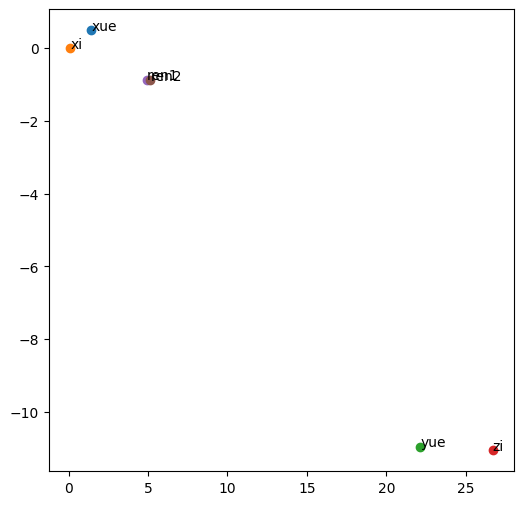

In [25]:
words = ['学', '习', '曰', '子', '人', '仁']
words_pinyin = ['xue', 'xi', 'yue', 'zi', 'ren1', 'ren2']

plt.figure(figsize=(6, 6))
for i, word in enumerate(words):
    plt.scatter(M[word2index[word], 0], M[word2index[word], 1])
    plt.text(M[word2index[word], 0], M[word2index[word], 1], words_pinyin[i])
plt.show()

## T2. Play with Pretrained Word Vectors

Checkout the `gensim` library and its `downloader` API here: https://radimrehurek.com/gensim/downloader.html

In [26]:
def load_embedding_model():
    """ Load Pretrained Vectors
        Return:
            wv_from_bin: All embeddings, each lengh 200 (or 300 if using Google News)
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200") # file size 252.1MB, vocab size 400k, dim 200
    # You can also try "word2vec-google-news-300", which is much larger 1600+MB
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin
# Run this to get the full corpora information
# import gensim.downloader as api
# api.info()

In [27]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This will take a couple minutes
# -----------------------------------

wv_from_bin = load_embedding_model()

[==================================================] 100.0% 252.1/252.1MB downloaded
Loaded vocab size 400000


In [28]:
import scipy
print(scipy.__version__)

1.13.1


Play with word analogy task using the `most_similar` method of the `KeyedVectors` class.

In [29]:
import pprint

# Run this cell to answer the analogy -- man : grandfather :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'grandfather'], negative=['man']))

[('grandmother', 0.7608445286750793),
 ('granddaughter', 0.7200808525085449),
 ('daughter', 0.7168302536010742),
 ('mother', 0.7151536345481873),
 ('niece', 0.7005682587623596),
 ('father', 0.6659887433052063),
 ('aunt', 0.6623408794403076),
 ('grandson', 0.6618767976760864),
 ('grandparents', 0.644661009311676),
 ('wife', 0.6445354223251343)]


Follow the above example and try any other analogy tasks you like.

For instance, China: Beijing = Japan: ?

In [33]:
### START TODO ###
pprint.pprint(wv_from_bin.most_similar(positive=['japan', 'beijing'], negative=['china']))
### END TODO ###

[('tokyo', 0.8006291389465332),
 ('japanese', 0.7149688601493835),
 ('seoul', 0.6801325082778931),
 ('osaka', 0.5845085382461548),
 ('pyongyang', 0.559124767780304),
 ('korea', 0.5431778430938721),
 ('hashimoto', 0.5398509502410889),
 ('koizumi', 0.532428503036499),
 ('kyodo', 0.5086474418640137),
 ('taipei', 0.5083218812942505)]
